In [286]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
boston = load_boston()

In [287]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [288]:
print(boston.data.shape)

(506, 13)


In [289]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [388]:
import pandas as pd

bos = pd.DataFrame(boston.data)

#Multiplying the negative and positive correlated feature.
bos[13] = bos[5] * bos[12]
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,32.74350
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,58.68794
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,28.95555
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,20.57412
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,38.09351


In [389]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
bos.isnull().sum()/len(bos)*100

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
PRICE    0.0
dtype: float64

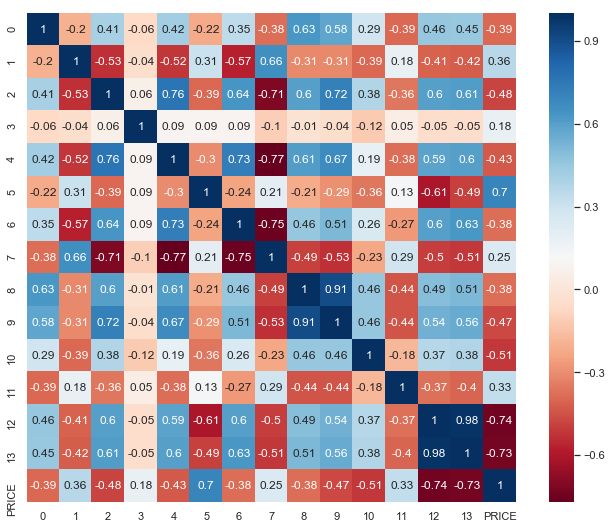

In [390]:

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(bos.corr().round(2), square=True, cmap='RdBu', annot=True)

In [391]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 14)
(152, 14)
(354,)
(152,)


In [392]:
from sklearn import preprocessing
std_bos_df = preprocessing.StandardScaler()
X_train = std_bos_df.fit_transform(X_train)
X_test=std_bos_df.transform(X_test)

y_im = pd.DataFrame(Y_train)
print(y_im.shape)
df_bos_train=pd.DataFrame(X_train)

y_im = y_im.set_index(df_bos_train.index)

df_bos_train['PRICE']= y_im

print("% of NaN Before Imputation in Price:",df_bos_train['PRICE'].isnull().sum()/len(df_bos_train['PRICE'])*100)

(354, 1)
% of NaN Before Imputation in Price: 0.0


In [393]:
#Function to sample the dataset randomly into equal batch size.
from sklearn.metrics import mean_squared_error

def random_sampling(dataset,batch_size):
    data_rand=dataset.sample(batch_size)
    x=np.array(data_rand.drop('PRICE',axis=1))
    y=np.array(data_rand['PRICE'])
    return x,y

def sgd_manual_algo(bsize):
    Wj,Bj,iteration,lr,k=np.zeros(shape=(1,14)),0,1000,0.01,len(X_train[:bsize])

    while iteration >=0:
        w0,b0,w_interm,b_interm=Wj,Bj,np.zeros(shape=(1,14)),0
        
        x,y =random_sampling(df_bos_train,bsize)
        for i in range(k):
            w_interm+=(-2)*x[i]*(y[i]-(np.dot(w0,x[i])+b0))
            b_interm+=(-2)*(y[i]-(np.dot(w0,x[i])+b0))

        Wj=(w0-lr*(w_interm)/k)
        Bj=(b0-lr*(b_interm)/k)

        iteration-=1

    print(Wj)
    print(Bj)
    return Wj,Bj
 
W,B = sgd_manual_algo(25)

Y_pred_m=list()

for i in range(len(X_test)):
    Y_lr=np.dot(W,X_test[i])+B
    Y_pred_m.append(np.asscalar(Y_lr))
    
MSE_custom=mean_squared_error(Y_test,Y_pred_m)
print('MEAN SQUARED ERROR =',MSE_custom)

[[-1.22959024  0.91525315 -0.40441843  0.38055621 -1.48055309  3.11691146
  -0.04725126 -2.60440677  2.10643907 -1.3484467  -1.96749921  0.85842795
   0.23719234 -4.02737259]]
[22.54405388]
MEAN SQUARED ERROR = 26.62411675411695


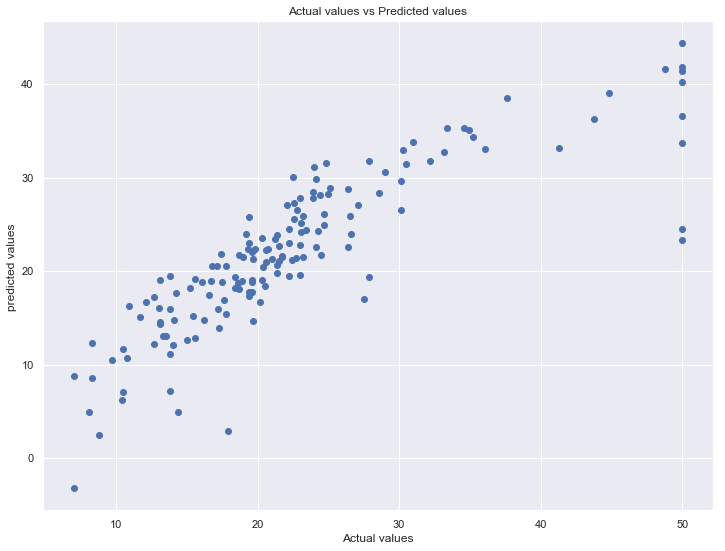

In [394]:
#Plot a chart of predicted values Vs actual values of your own SGD Implementation

plt.scatter(Y_test,Y_pred_m)
plt.xlabel('Actual values')
plt.ylabel('predicted values ')
plt.title('Actual values vs Predicted values')
plt.show()

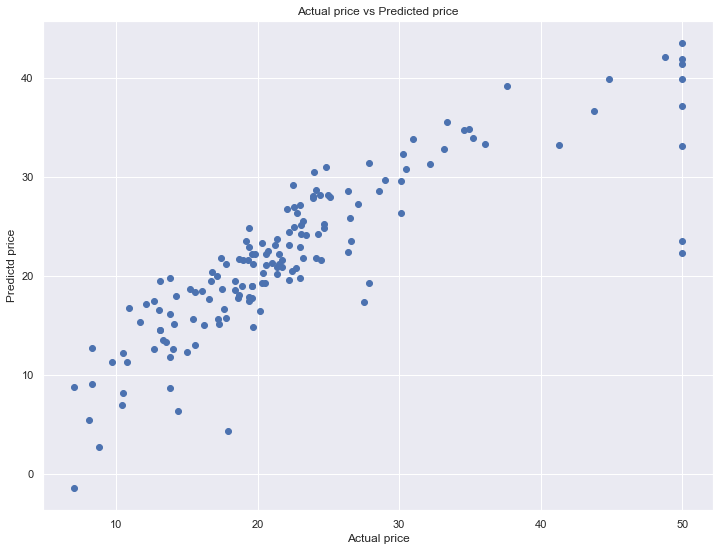

Mean squared error = 25.943491484577017


In [395]:
#SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.0001  )
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


MSE_sgd=mean_squared_error(Y_test,Y_pred)
print('Mean squared error =',MSE_sgd)

In [396]:
#In a tabular format,compare the weights obtained from your own 
#implementation with the weights obtained after applying sklearn's SGDRegresser.

# Creating the table using PrettyTable library

from prettytable import PrettyTable


Serialno = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

sgd_weights = sgd.coef_ 
table = PrettyTable()
table.add_column("Slno.",Serialno)
table.add_column("Weights of Custom SGD",W.ravel())
table.add_column("Weights of Sklearn's SGD",sgd_weights)

# Printing the Table
print(table)

+-------+-----------------------+--------------------------+
| Slno. | Weights of Custom SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |  -1.2295902405202404  |   -1.2524209366560528    |
|   2   |   0.9152531472632865  |    0.8021467523772066    |
|   3   |  -0.4044184291186882  |   -0.1766732178997423    |
|   4   |  0.38055620659667744  |   0.16764909544275203    |
|   5   |  -1.4805530930320114  |   -1.4184567054026667    |
|   6   |   3.116911463420513   |    3.603847206819644     |
|   7   |  -0.04725126421658947 |   -0.09848804808275302   |
|   8   |   -2.604406767280667  |    -2.542592111878423    |
|   9   |   2.1064390672539925  |    2.4645473789567074    |
|   10  |  -1.3484466995157338  |   -1.7874423245835076    |
|   11  |  -1.9674992052220444  |   -1.9066902534175578    |
|   12  |   0.8584279544107069  |    0.8866140065939877    |
|   13  |  0.23719233714358753  |    1.9298073750395008    |
|   14  |   -4.027372588

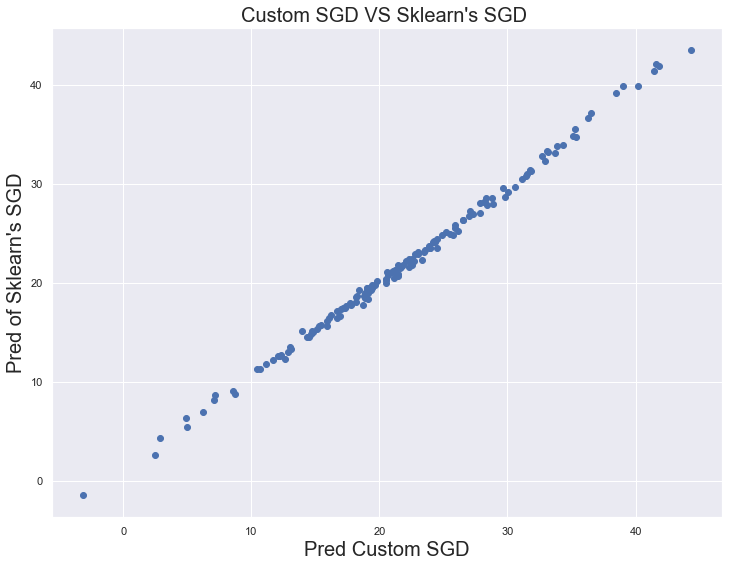

In [397]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(Y_pred_m, Y_pred)
plt.xlabel("Pred Custom SGD",size=20)
plt.ylabel("Pred of Sklearn's SGD",size=20)
plt.title("Custom SGD VS Sklearn's SGD ",size=20)
plt.show()

In [398]:
# Mean Squared Error (MSE)
print("Mean Squared Error the custom SGD     : ",MSE_custom)
print("Mean Squared Error the Sklearn's  SGD : ",MSE_sgd)

Mean Squared Error the custom SGD     :  26.62411675411695
Mean Squared Error the Sklearn's  SGD :  25.943491484577017
